In [6]:
from matplotlib import pyplot as plt
import nsmod
import os 
import numpy as np
from numpy import sin, cos, tan
from matplotlib.ticker import MultipleLocator 
%matplotlib inline

from nsmod.switching_torque_with_Euler import main
from nsmod import Plot, File_Functions, Model

# Generating plots for the Inertial space results
In this notebook all plots for this section are generated. We will use the `nsmod.switching_torque_with_Euler` model with the switching paramater $\upsilon=0$. This reduces the number of models that we need while the speed savings are most likely negligible. 


## Biaxial body with no torque

./data/Unknown_SpindownTorqueSwitching_1_chi0_8.0000000000e+01_omega0_1.00e+01_epsI3_1.00e-03_AnomTorqueSwitching_1_n_10000_a0_1.5000000000e+01_T_5.00e+03_upsilon_0.00e+00_epsA_0.00e+00_epsI1_0.00e+00_AnomTorque_1.hdf5
Saving figure as ./img/Spherical_Plot_Unknown_SpindownTorqueSwitching_1_chi0_8.0000000000e+01_omega0_1.00e+01_epsI3_1.00e-03_AnomTorqueSwitching_1_n_10000_a0_1.5000000000e+01_T_5.00e+03_upsilon_0.00e+00_epsA_0.00e+00_epsI1_0.00e+00_AnomTorque_1.pdf


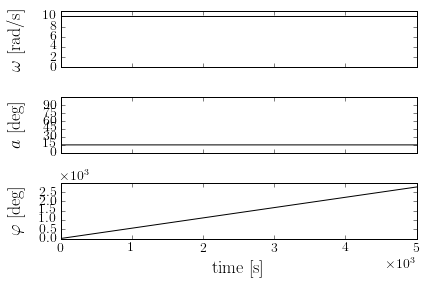

./data/Unknown_SpindownTorqueSwitching_1_chi0_8.0000000000e+01_omega0_1.00e+01_epsI3_1.00e-03_AnomTorqueSwitching_1_n_10000_a0_1.5000000000e+01_T_5.00e+03_upsilon_0.00e+00_epsA_0.00e+00_epsI1_0.00e+00_AnomTorque_1.hdf5
./data/Unknown_SpindownTorqueSwitching_1_chi0_8.0000000000e+01_omega0_1.00e+01_epsI3_1.00e-03_AnomTorqueSwitching_1_n_10000_a0_1.5000000000e+01_T_5.00e+03_upsilon_0.00e+00_epsA_0.00e+00_epsI1_0.00e+00_AnomTorque_1.hdf5
BETA FUNCTION IS USED
BETA FUNCTION IS USED
BETA FUNCTION IS USED
BETA FUNCTION IS USED
Saving figure as ./img/Euler_Angles_Unknown_SpindownTorqueSwitching_1_chi0_8.0000000000e+01_omega0_1.00e+01_epsI3_1.00e-03_AnomTorqueSwitching_1_n_10000_a0_1.5000000000e+01_T_5.00e+03_upsilon_0.00e+00_epsA_0.00e+00_epsI1_0.00e+00_AnomTorque_1.pdf


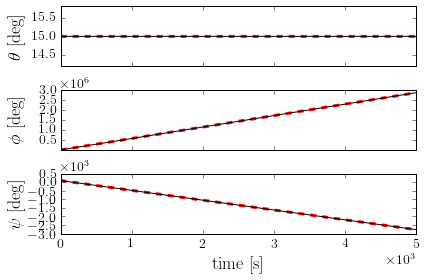

In [7]:
T = 5e3
omega0 = 10
epsI3 = 1e-3
a0 = 15.0
file_name = main(chi0=80, epsI3=epsI3, epsA=0.0, omega0=omega0, T=T, 
                 n=10000, error=1e-18, a0=a0, cleanup=False)

axes = Plot.Spherical_Plot(file_name, save_fig=True)
plt.show()

axes = Plot.Euler_Angles(file_name, save_fig=True, analytic=True)

plt.show()

## Variation with chi

./data/Unknown_SpindownTorqueSwitching_1_chi0_1.0000000000e+01_omega0_6.28e+00_epsI3_1.00e-03_AnomTorqueSwitching_1_n_1000_a0_2.0000000000e+01_T_5.00e+03_upsilon_0.00e+00_epsA_0.00e+00_epsI1_0.00e+00_AnomTorque_1.hdf5
./data/Unknown_SpindownTorqueSwitching_1_chi0_1.0000000000e+01_omega0_6.28e+00_epsI3_1.00e-03_AnomTorqueSwitching_1_n_1000_a0_2.0000000000e+01_T_5.00e+03_upsilon_0.00e+00_epsA_0.00e+00_epsI1_0.00e+00_AnomTorque_1.hdf5
BETA FUNCTION IS USED
BETA FUNCTION IS USED
./data/Unknown_SpindownTorqueSwitching_1_chi0_1.0000000000e+01_omega0_6.28e+00_epsI3_1.00e-03_AnomTorqueSwitching_1_n_1000_a0_2.0000000000e+01_T_5.00e+03_upsilon_0.00e+00_epsA_0.00e+00_epsI1_0.00e+00_AnomTorque_1.hdf5
BETA FUNCTION IS USED
BETA FUNCTION IS USED
./data/Unknown_SpindownTorqueSwitching_1_chi0_2.0000000000e+01_omega0_6.28e+00_epsI3_1.00e-03_AnomTorqueSwitching_1_n_1000_a0_2.0000000000e+01_T_5.00e+03_upsilon_0.00e+00_epsA_0.00e+00_epsI1_0.00e+00_AnomTorque_1.hdf5
./data/Unknown_SpindownTorqueSwitching_1

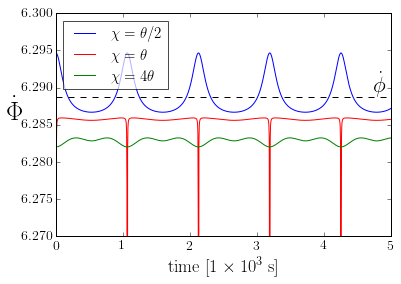

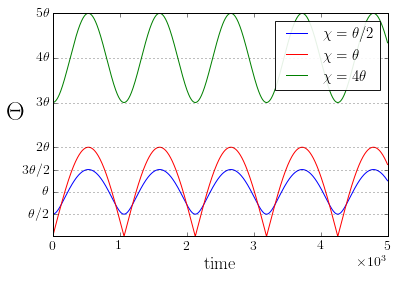

In [8]:
a0 = 20
epsI3 = 1e-3
omega0 = 1 * 2 * np.pi
epsA = 0.0
T = 5e3

a0_rad = np.radians(a0)
theta_0 = np.arccos(cos(a0_rad) * (1 + epsI3) * pow(pow(sin(a0_rad), 2) 
                            + pow(cos(a0_rad) * (1 + epsI3), 2), -0.5))

chi0_list = [10.0, 20.0, 80.0]
label_list = [r"$\chi=\theta/2$", r"$\chi=\theta$", r"$\chi= 4\theta$"]
color_list = ["b", "r", "g"]
#chi_list = [np.degrees(theta_0)]
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

for i, chi0 in enumerate(chi0_list):
    file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                     n=1000, error=1e-14, a0=a0, cleanup=True, )
    
    time, w1, w2, w3, theta, phi, psi = nsmod.File_Functions.Euler_Angles_Import(file_name)
    (t_scaled, scale_val) = nsmod.Useful_Tools.Sort_Out_Some_Axis(time)

    ax1 = nsmod.Plot.big_phi_dot(file_name, ax=ax1, label=label_list[i], color=color_list[i])

    ax2 = nsmod.Plot.big_theta(file_name, ax=ax2, label=label_list[i], color=color_list[i])
    
# Add horizontal lines to ax1; note phi dot is the same regardless of chi
xfit, yfit, f_p = nsmod.Useful_Tools.Fit_Function(time, phi, 1)
phi_dot = f_p[0]
ax1.axhline(phi_dot, ls="--", color="k",) #label=r"$\dot{\phi}$")
ax1.text(0.95*ax1.get_xlim()[1], 1.0001*(phi_dot), r"$\dot{\phi}$", size=22)
xfit, yfit, f_p = nsmod.Useful_Tools.Fit_Function(time, psi, 1)
psi_dot = f_p[0]
#ax1.axhline(phi_dot+psi_dot, ls="-.", color="k", )#label=r"$\dot{\phi}+ \dot{\psi}$")
#ax1.text(0.9*ax1.get_xlim()[1], 0.9998*(phi_dot+psi_dot), r"$\dot{\phi}+ \dot{\psi}$", size=22)

delta = 0.015
ax1.set_ylim(6.285-delta, 6.285+delta)
ax1.legend(framealpha=0.7, loc=2, ncol=1)
fig1.savefig("img/frequency_variation_with_chi.pdf")

# Add horizontal lines tp ax2; note psi dot is the same regardless of chi
ax2.set_yticks([10.0, 20.0,30,40, 60.0,80.0, 100])
ax2.set_yticklabels([r"$\theta/2$", r"$\theta$", r"$3\theta/2$", r"$2\theta$", r"$3\theta$", r"$4\theta$", r"$5\theta$"])
ax2.grid(True, axis='y')
ax2.legend(framealpha=0.9, loc=1)
fig2.savefig("img/polar_angle_variation_with_chi.pdf")

plt.show()

## Timing residuals and slowdown 

./data/Unknown_SpindownTorqueSwitching_1_chi0_1.0000000000e+01_omega0_6.28e+00_epsI3_1.00e-03_AnomTorqueSwitching_1_n_10000_a0_2.0000000000e+00_T_5.00e+03_upsilon_0.00e+00_epsA_0.00e+00_epsI1_0.00e+00_AnomTorque_1.hdf5
BETA FUNCTION IS USED
BETA FUNCTION IS USED
./data/Unknown_SpindownTorqueSwitching_1_chi0_1.0000000000e+01_omega0_6.28e+00_epsI3_1.00e-03_AnomTorqueSwitching_1_n_10000_a0_2.0000000000e+00_T_5.00e+03_upsilon_0.00e+00_epsA_0.00e+00_epsI1_0.00e+00_AnomTorque_1.hdf5
BETA FUNCTION IS USED
BETA FUNCTION IS USED
./data/Unknown_SpindownTorqueSwitching_1_chi0_1.9980036182e+00_omega0_6.28e+00_epsI3_1.00e-03_AnomTorqueSwitching_1_n_10000_a0_2.0000000000e+00_T_5.00e+03_upsilon_0.00e+00_epsA_0.00e+00_epsI1_0.00e+00_AnomTorque_1.hdf5
BETA FUNCTION IS USED
BETA FUNCTION IS USED
./data/Unknown_SpindownTorqueSwitching_1_chi0_1.9980036182e+00_omega0_6.28e+00_epsI3_1.00e-03_AnomTorqueSwitching_1_n_10000_a0_2.0000000000e+00_T_5.00e+03_upsilon_0.00e+00_epsA_0.00e+00_epsI1_0.00e+00_AnomTorque

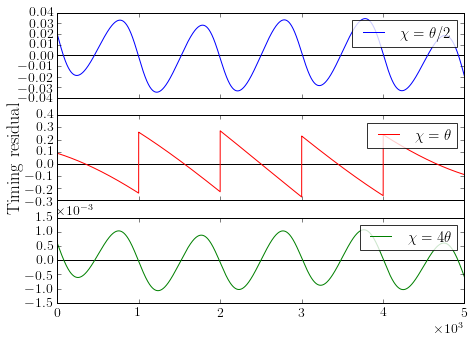

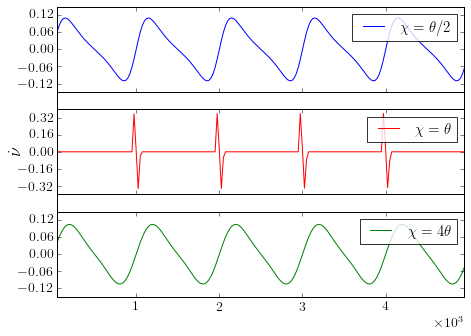

In [9]:
a0 = 2
epsI3 = 1e-3
omega0 = 2 * np.pi
epsA = 0.0
T = 5e3

a0_rad = np.radians(a0)
theta_0 = np.arccos(cos(a0_rad) * (1 + epsI3) * pow(pow(sin(a0_rad), 2) 
                            + pow(cos(a0_rad) * (1 + epsI3), 2), -0.5))

chi0_list = [10.0, np.degrees(theta_0), 80.0]
label_list = [r"$\chi=\theta/2$", r"$\chi=\theta$", r"$\chi= 4\theta$", "something else"]
color_list = ["b", "r", "g", "k"]

fig1 = plt.figure(figsize=(7.3, 5.2))
ax_1 = fig1.add_subplot(111, yticklabels=[], xticklabels=[], ylabel="Timing residual")
ax_1.yaxis.labelpad = 30
ax11 = fig1.add_subplot(311)
ax12 = fig1.add_subplot(312)
ax13 = fig1.add_subplot(313)

fig2 = plt.figure(figsize=(7.3, 5.2))
ax_2 = fig2.add_subplot(111, yticklabels=[], xticklabels=[], ylabel=r"$\dot{\nu}$")
ax_2.yaxis.labelpad = 30
ax21 = fig2.add_subplot(311)
ax22 = fig2.add_subplot(312)
ax23 = fig2.add_subplot(313)

        

for chi0, label, color, ax1, ax2 in zip(chi0_list, label_list, color_list, 
                                        [ax11, ax12, ax13], 
                                        [ax21, ax22, ax23] ):
    
    file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                     n=10000, error=1e-16, a0=a0, cleanup=True)
    
    ax1 = Plot.PhaseResidual(file_name, ax=ax1, 
                                    label=label, color=color,
                                    analytic="FP")
    
    ax2 = Plot.SpindownRate(file_name, ax=ax2, normalise=True,
                                    label=label, color=color)
    
   
    ax1.set_xlabel("")
    ax1.set_ylabel("")
    #ax1.set_yticklabels([])
    ax1.legend(framealpha=0.8)
    ax2.set_ylabel("")
    ax2.set_xlabel("")
    #ax2.set_yticklabels([])
    ax2.legend(framealpha=0.8)
    locators = np.diff(ax2.get_ylim())[0]/5.
    ax2.yaxis.set_major_locator(MultipleLocator(locators))
    
ax11.set_xticklabels([]) 
ax12.set_xticklabels([])
fig1.subplots_adjust(hspace=0.2)
#ax1.axhline(0.0, ls="-", color="k", lw=.5)    
#ax1.legend(framealpha=0.9, loc=1)
fig1.savefig("img/Phase_residuals_no_torque.pdf")

ax21.set_xticklabels([]) 
ax22.set_xticklabels([])
fig2.subplots_adjust(hspace=0.2)
#ax2.legend(framealpha=0.9, loc=1)
#ax22.set_xlim(1e3, 5e3)
#ax22.set_ylim()
fig2.savefig("img/Spindown_no_torque.pdf")

plt.show()


## Pulse amplitude 

./data/Unknown_SpindownTorqueSwitching_1_chi0_3.0000000000e+01_omega0_1.00e+00_epsI3_3.00e-02_AnomTorqueSwitching_1_n_1000_a0_1.0000000000e+01_T_2.50e+02_upsilon_0.00e+00_epsA_0.00e+00_epsI1_0.00e+00_AnomTorque_1.hdf5
BETA FUNCTION IS USED
BETA FUNCTION IS USED


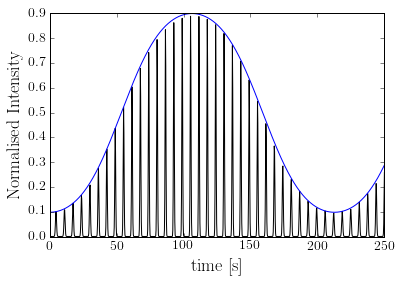

In [11]:
epsI1=0.0
epsI3=3.0e-2
epsA=0.0
omega0=1
error=1e-12
T=250 
chi0 = 30.0
AnomTorque=True
a0=10.0
upsilon=0.0
n=10000
cleanup=False
Phi0=0
Theta0=45
sigmaB=0.2

Phi0 = np.radians(Phi0)
Theta0 = np.radians(Theta0)

file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                     n=1000, error=1e-16, a0=a0, cleanup=True, upsilon=upsilon)
    
ax = Plot.Intensity(file_name, Phi0, Theta0, sigmaB)
plt.savefig("img/intensity_variation.pdf")
plt.show()

## Cosine and constant

In [ ]:
from numpy import pi
ax = plt.subplot(111)

x = np.linspace(-pi, pi, 100)
ax.axhline(0, ls="-", color="k")
ax.plot(x, np.cos(x))
ax.set_xlim(-pi, pi)
ax.set_xticks([-pi, 0, pi])
ax.set_xticklabels(["$\Phi_{\mathrm{obs}} - \pi$", 
                    "$\Phi_{\mathrm{obs}}$",
                    "$\Phi_{\mathrm{obs}} + \pi$"])
k = 0.6
ax.axhline(k, ls="--", color="k")
ax.set_yticks([k])
ax.set_yticklabels(['const.'])

x_fill = np.linspace(np.arccos(k), -np.arccos(k), 100)
#ax.fill_between(x_fill, 0, np.cos(x_fill), color="k", alpha=0.5)

ax.set_xlabel("Dipole azimuth $\Phi$")
ax.set_ylabel("$\cos(\Phi - \Phi_{\mathrm{obs}})$")

ax.annotate("",
            xy=(-np.arccos(k)-0.02, -0.1), xycoords='data',
            xytext=(np.arccos(k)+0.01, -0.1), textcoords='data',
            arrowprops=dict(arrowstyle="|-|",
                            connectionstyle="arc3"),
            )
ax.annotate("$\Delta\Phi$",
            xy=(0, -0.2), xycoords='data',
            xytext=(0, -0.2), textcoords='data', 
            )

ax.axvline(-np.arccos(k), lw=0.2, color="k")
ax.axvline(np.arccos(k), lw=0.2, color="k")

plt.savefig("img/CosineIllustration.pdf")
plt.show()

In [ ]:
epsI1=0.0
epsI3=3.0e-4
epsA=0.0
omega0=1.
T=5e4
chi0 = 12.0
a0=10
AnomTorque=True
upsilon=0.0
n=100000
cleanup=False,
Theta0=10
sigmaB = 0.3
eta=0.01

Theta0 = np.radians(Theta0)

file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                     n=1000, error=1e-16, a0=a0, cleanup=True, upsilon=upsilon)

ax = Plot.PulseWidth(file_name, Theta0, sigmaB , p=50,
                      eta=eta, ls="-")
plt.savefig("img/Pulse_width_modulation.pdf")
plt.show()